## Tropospheric delay for ALOS-2 stripmap time-series

In [1]:
%matplotlib inline
import os
import h5py
import numpy as np
from matplotlib import pyplot as plt
figsize = [12,4]

from mintpy.objects import timeseries
from mintpy.utils import readfile, writefile, ptime, plot as pp, utils as ut
from mintpy import view

#work_dir = os.path.expanduser('~/data/Kirishima/Alos2AT131F620/mintpyMli')
work_dir = os.path.expanduser('~/data/Kirishima/Alos2DT23F2970/mintpyMli')
os.chdir(work_dir)
print('Go to directory', work_dir)

tropo_file = 'ERA5.h5'
ts_obj = timeseries(tropo_file)
ts_obj.open()
num_pixel = ts_obj.length * ts_obj.width
center_idx = int(ts_obj.width * (ts_obj.length / 2) + ts_obj.width / 2)

Go to directory /Users/yunjunz/data/Kirishima/Alos2DT23F2970/mintpyMli
open timeseries file: ERA5.h5


save figure to file /Users/yunjunz/data/Kirishima/Alos2DT23F2970/mintpyMli/TS_tropo.png


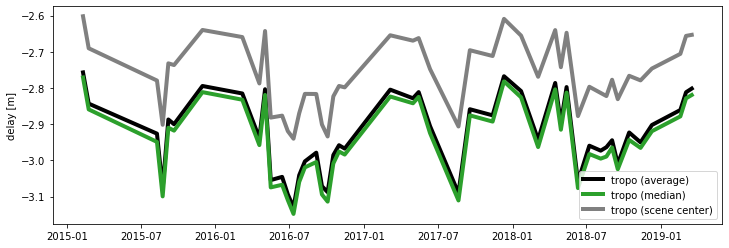

In [2]:
# 2. read data
ts_data = readfile.read(tropo_file)[0].reshape(ts_obj.numDate, -1)

# 3. plot median / mean / center
# calculate median and mean
ts_tropo_avg = np.nanmean(ts_data, axis=-1)
ts_tropo_med = np.nanmedian(ts_data, axis=-1)
ts_tropo_cen = ts_data[:, center_idx]

# plot
fig, ax = plt.subplots(figsize=figsize)
ax.plot(ts_obj.times, ts_tropo_avg, linewidth=4, color='k',             label='tropo (average)')
ax.plot(ts_obj.times, ts_tropo_med, linewidth=4, color=pp.mplColors[2], label='tropo (median)')
ax.plot(ts_obj.times, ts_tropo_cen, linewidth=4, color='gray',          label='tropo (scene center)')
ax.set_ylabel('delay [m]')
#ax.set_xlim(left=ts_obj.times[-30])
plt.legend()

# output
out_fig = os.path.abspath('TS_tropo.png')
print('save figure to file', out_fig)
plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=300)
plt.show()

#### Zoom-in the difference between median-average and median-center

save figure to file /Users/yunjunz/data/Kirishima/Alos2DT23F2970/mintpyMli/TS_tropo_diff.png


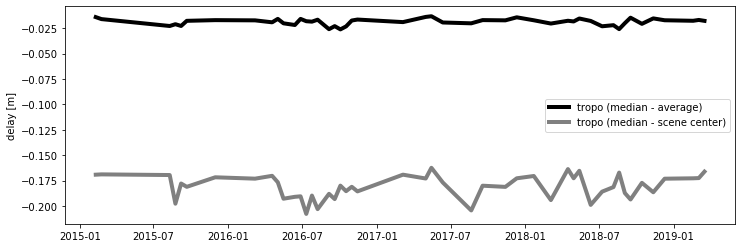

In [3]:
# plot median / mean / center difference
fig, ax = plt.subplots(figsize=figsize)
ax.plot(ts_obj.times, ts_tropo_med - ts_tropo_avg, linewidth=4, color='k', label='tropo (median - average)')
ax.plot(ts_obj.times, ts_tropo_med - ts_tropo_cen, linewidth=4, color='gray', label='tropo (median - scene center)')
ax.set_ylabel('delay [m]')
#ax.set_xlim(left=ts_obj.times[-30])
plt.legend()

# output
out_fig = os.path.abspath('TS_tropo_diff.png')
print('save figure to file', out_fig)
plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=300)
plt.show()

#### Variation between dry and wet troposphere

Dry troposphere: large absolute value with little variation

Wet troposphere: small absolute value with large  variation

save figure to file /Users/yunjunz/data/Kirishima/Alos2DT23F2970/mintpyMli/TS_tropo_dry_wet.png


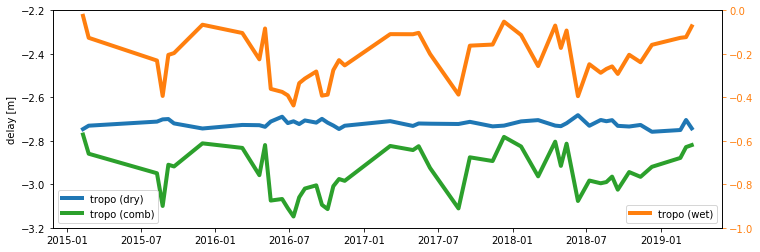

In [7]:
# 2. read data and calculate median
ts_dry  = np.nanmedian(readfile.read(os.path.join(work_dir, 'ERA5dry.h5'))[0].reshape(ts_obj.numDate, -1), axis=-1)
ts_wet  = np.nanmedian(readfile.read(os.path.join(work_dir, 'ERA5wet.h5'))[0].reshape(ts_obj.numDate, -1), axis=-1)
ts_comb = np.nanmedian(readfile.read(os.path.join(work_dir, 'ERA5.h5'))[0].reshape(ts_obj.numDate, -1), axis=-1)

# plot
fig, ax = plt.subplots(figsize=figsize)
ax.plot(ts_obj.times, ts_dry,  linewidth=4, color=pp.mplColors[0], label='tropo (dry)')
ax.plot(ts_obj.times, ts_comb, linewidth=4, color=pp.mplColors[2], label='tropo (comb)')
ax.set_ylabel('delay [m]')
ax.set_ylim(-3.2, -2.2)
ax.legend(loc='lower left')

ax2 = ax.twinx()
ax2.plot(ts_obj.times, ts_wet,  linewidth=4, color=pp.mplColors[1], label='tropo (wet)')
ax2.tick_params(which='both', axis='y', colors=pp.mplColors[1])
ax2.set_ylim(-1.0, 0.0)
ax2.legend(loc='lower right')

# output
out_fig = os.path.abspath('TS_tropo_dry_wet.png')
print('save figure to file', out_fig)
plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=300)
plt.show()